## Centrality betweenness

Importamos las librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para leer desde un archivo
import pandas as pd 
import numpy as np
#Para generar errores aleatorios
import random

# Mapa de calor

In [2]:
def mapacalor_intermediacion(G, nombre_mcalor_grado):
    degree_map = {node:nx.betweenness_centrality(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('spring')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Intermediación')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

### Función para obtener el número de componentes conectados

In [3]:
def num_componentes_conectados(G):
    num_cc=nx.number_connected_components(G)
    return num_cc

### Función para obtener la proporción del componente gigante

In [4]:
def prop_componente_gigante(G):
    num_cc=num_componentes_conectados(G)
    Gcc =sorted(nx.connected_components(G), key=len, reverse=True)
    GC= G.subgraph(Gcc[0])
    n=len(nx.nodes(G))
    n_GC=len(nx.nodes(GC))
    proporcioncg=n_GC/n
    print("Componente gigante:"+str(proporcioncg))
    return proporcioncg

### Función para obtener el nodo intermedio

In [13]:
def centralidad_intermediacion(G):
    intermediacion=nx.betweenness_centrality(G)
    cntr_inter=max(intermediacion.values())
    print("Intermediación:"+str(cntr_inter))
    for key in intermediacion:
        if cntr_inter==intermediacion[key]:
            print("El nodo"+str(key)+" es el nodo intermedio")
            return key

## Función para gráficar

In [6]:
def grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)
    plt.plot(f1_valores, label=f1_leyenda)
    plt.plot(f2_valores, label=f2_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()

## Función para atacar nodos por intermediacion

In [7]:
def ataque_inter(G):
    nodo_atacado=centralidad_intermediacion(G)
    G.remove_node(nodo_atacado)
    print("El nodo"+str(nodo_atacado)+" fue atacado")
    return G

## Función para simular varios ataques por intermediacion

In [8]:
def ataques_secuenciales(G,num_ataques):
    num_cc_lista=list()
    prop_cg_lista=list()
    for i in range(num_ataques):
        red_atacada=ataque_inter(G)
        num_cc_lista.append(num_componentes_conectados(red_atacada))
        prop_cg_lista.append(prop_componente_gigante(red_atacada))
    return (num_cc_lista, prop_cg_lista)

## Creación de red escala libre Modelo Barabasi-Albert

In [9]:
escala_libreBA=nx.barabasi_albert_graph(100,5)

## Creación de red aleatoria modelo Erdös-Rényi

In [10]:
red_eleatoriaER=nx.erdos_renyi_graph(100,0.1)

## Mapa de calor por intermediación

In [17]:
mapacalor_intermediacion(escala_libreBA,"Mapa de calor intermediación escala libre")

ZeroDivisionError: float division by zero

## Mapa de calor red aleatoria

In [ ]:
mapacalor_intermediacion(red_eleatoriaER,"Mapa de calor intermediación red aleatoria")

## Simulación de ataques por intermediación red escala libre

In [14]:
escala_libre_test = escala_libreBA.copy()
(num_cc_lista_escala_libre,prop_cg_lista_escala_libre)=ataques_secuenciales(escala_libre_test, 99)

Intermediación:0.1969929068921127
El nodo5 es el nodo intermedio
El nodo5 fue atacado
Componente gigante:1.0
Intermediación:0.15067893441928817
El nodo6 es el nodo intermedio
El nodo6 fue atacado
Componente gigante:1.0
Intermediación:0.09161661531623742
El nodo8 es el nodo intermedio
El nodo8 fue atacado
Componente gigante:1.0
Intermediación:0.0837384943721673
El nodo10 es el nodo intermedio
El nodo10 fue atacado
Componente gigante:1.0
Intermediación:0.08471900896412089
El nodo18 es el nodo intermedio
El nodo18 fue atacado
Componente gigante:1.0
Intermediación:0.08977767880132796
El nodo7 es el nodo intermedio
El nodo7 fue atacado
Componente gigante:1.0
Intermediación:0.10257122553976208
El nodo9 es el nodo intermedio
El nodo9 fue atacado
Componente gigante:1.0
Intermediación:0.10694988288937907
El nodo24 es el nodo intermedio
El nodo24 fue atacado
Componente gigante:0.9891304347826086
Intermediación:0.09501724013178738
El nodo15 es el nodo intermedio
El nodo15 fue atacado
Componente g

## Simulación de ataques por intermediación red aleatoria

In [15]:
red_aleatoria_test = red_eleatoriaER.copy()
(num_cc_lista_aleatoria,prop_cg_lista_aleatoria)=ataques_secuenciales(red_aleatoria_test, 99)

Intermediación:0.043478655616271185
El nodo12 es el nodo intermedio
El nodo12 fue atacado
Componente gigante:1.0
Intermediación:0.03705970109423377
El nodo72 es el nodo intermedio
El nodo72 fue atacado
Componente gigante:1.0
Intermediación:0.039835461187551775
El nodo78 es el nodo intermedio
El nodo78 fue atacado
Componente gigante:1.0
Intermediación:0.04094085624216424
El nodo2 es el nodo intermedio
El nodo2 fue atacado
Componente gigante:1.0
Intermediación:0.04302217899255361
El nodo80 es el nodo intermedio
El nodo80 fue atacado
Componente gigante:1.0
Intermediación:0.04364634871880937
El nodo97 es el nodo intermedio
El nodo97 fue atacado
Componente gigante:1.0
Intermediación:0.04165689260782473
El nodo66 es el nodo intermedio
El nodo66 fue atacado
Componente gigante:1.0
Intermediación:0.04321968473678657
El nodo13 es el nodo intermedio
El nodo13 fue atacado
Componente gigante:1.0
Intermediación:0.04432296464282751
El nodo73 es el nodo intermedio
El nodo73 fue atacado
Componente giga

## Grafica de componentes coonectados vs numero de errores

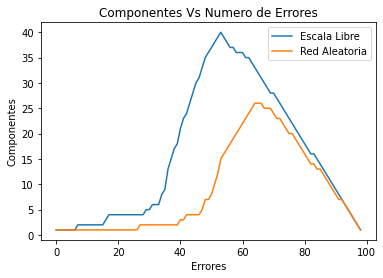

In [16]:
titulo="Componentes Vs Numero de Errores"
f1_valores=num_cc_lista_escala_libre
f2_valores=num_cc_lista_aleatoria
f1_leyenda="Escala Libre"
f2_leyenda="Red Aleatoria"
ejex_etiqueta="Errores"
ejey_etiqueta="Componentes"
grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta)

## Grafica de componente gigante vs numero de errores

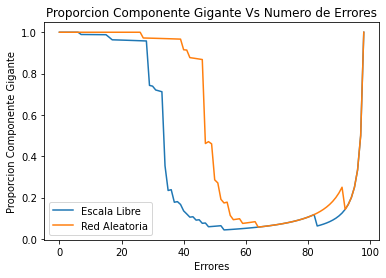

In [18]:
titulo="Proporcion Componente Gigante Vs Numero de Errores"
f1_valores=prop_cg_lista_escala_libre
f2_valores=prop_cg_lista_aleatoria
f1_leyenda="Escala Libre"
f2_leyenda="Red Aleatoria"
ejex_etiqueta="Errores"
ejey_etiqueta="Proporcion Componente Gigante"
grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta)